In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score

url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

penguins = penguins.drop(['studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments', 'Region'], axis = 1)
penguins = penguins.dropna()

penguins["Species"] = penguins["Species"].str.split().str.get(0)

recode1 = {"MALE"  : 0, "FEMALE" : 1, "." : 2}
penguins["Sex"] = penguins["Sex"].map(recode1)

recode2 = {'Biscoe'  : 0, 'Dream' : 1, 'Torgersen'  : 3}
penguins["Island"] = penguins["Island"].map(recode2)


penguins.head(10)

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
1,Adelie,3,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454
2,Adelie,3,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302
4,Adelie,3,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426
5,Adelie,3,39.3,20.6,190.0,3650.0,0,8.66496,-25.29805
6,Adelie,3,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799
7,Adelie,3,39.2,19.6,195.0,4675.0,0,9.46060,-24.89958
14,Adelie,3,34.6,21.1,198.0,4400.0,0,8.55583,-25.22588
16,Adelie,3,38.7,19.0,195.0,3450.0,1,9.18528,-25.06691
17,Adelie,3,42.5,20.7,197.0,4500.0,0,8.67538,-25.13993
18,Adelie,3,34.4,18.4,184.0,3325.0,1,8.47827,-25.23319


In [3]:
names = list(penguins.columns)[1:9]

import itertools
combos = list(itertools.combinations(names, 3))
combos

[('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'),
 ('Island', 'Culmen Length (mm)', 'Flipper Length (mm)'),
 ('Island', 'Culmen Length (mm)', 'Body Mass (g)'),
 ('Island', 'Culmen Length (mm)', 'Sex'),
 ('Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'),
 ('Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'),
 ('Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'),
 ('Island', 'Culmen Depth (mm)', 'Body Mass (g)'),
 ('Island', 'Culmen Depth (mm)', 'Sex'),
 ('Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'),
 ('Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'),
 ('Island', 'Flipper Length (mm)', 'Body Mass (g)'),
 ('Island', 'Flipper Length (mm)', 'Sex'),
 ('Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'),
 ('Island', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'),
 ('Island', 'Body Mass (g)', 'Sex'),
 ('Island', 'Body Mass (g)', 'Delta 15 N (o/oo)'),
 ('Island', 'Body Mass (g)', 'Delta 13 C (o/oo)'),
 ('Island', 'Sex', 'Delta 15 N (o/oo)'),
 ('Island', 'Sex', 'Delta 13 C 

In [4]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    T = tree.DecisionTreeClassifier(max_depth = 5)
    return cross_val_score(T, x_train[cols], y_train, cv = 5).mean()  


def test_column_score(tupCol):
    """
    Trains and evaluates a model on the test set using the columns of the data
    with selected indices
    """
    cols = list(tupCol)
    T = tree.DecisionTreeClassifier(max_depth = 5)
    T.fit(x_train[cols], y_train)
    return T.score(x_test[cols], y_test)


In [5]:
train, test = train_test_split(penguins, test_size = 0.3)
train.shape, test.shape

x_train = train.drop(['Species'], axis = 1)
y_train = train['Species'].values

x_test = test.drop(['Species'], axis = 1)
y_test = test['Species'].values

In [6]:
D = {}

for i in range(len(combos)): 
    cols = list(combos[i])
    x = check_column_score(cols)
    D[i] = x

In [7]:
L = list(D.items())
L.sort(key = lambda tup: tup[1], reverse = True)

best = L[0:10]

for where, score in best:
    print("---- " + str(where))
    print(str(combos[where]) + ", Score: " + str(np.round(score, 5)))
    test_score = test_column_score(combos[where])
    print("Test score is: " + str(np.round(test_score, 5)))

---- 3
('Island', 'Culmen Length (mm)', 'Sex'), Score: 0.98251
Test score is: 0.94898
---- 0
('Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'), Score: 0.98242
Test score is: 0.93878
---- 1
('Island', 'Culmen Length (mm)', 'Flipper Length (mm)'), Score: 0.97362
Test score is: 0.92857
---- 4
('Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'), Score: 0.96493
Test score is: 0.94898
---- 22
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)'), Score: 0.96483
Test score is: 0.95918
---- 21
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)'), Score: 0.96473
Test score is: 0.92857
---- 5
('Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'), Score: 0.96048
Test score is: 0.93878
---- 25
('Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'), Score: 0.96048
Test score is: 0.97959
---- 30
('Culmen Length (mm)', 'Body Mass (g)', 'Sex'), Score: 0.96048
Test score is: 0.91837
---- 26
('Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)'), Score: 0.955

In [8]:
X_train = train[list(combos[0])]
X_test = test[list(combos[0])]


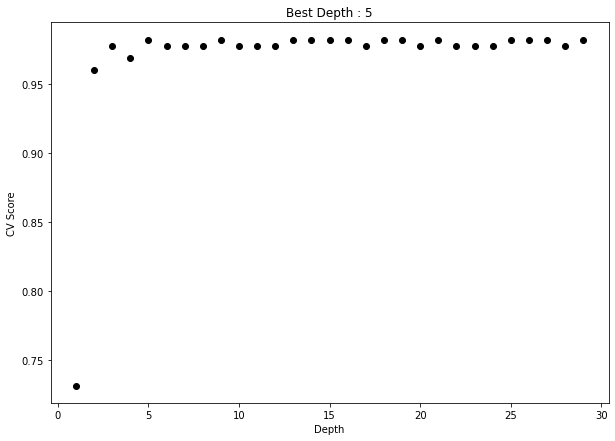

In [9]:
fig, ax = plt.subplots(1, figsize = (10, 7))

best_score = 0

for d in range(1,30):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

In [10]:
T = tree.DecisionTreeClassifier(max_depth = best_depth)
T.fit(X_train, y_train)
T.score(X_test, y_test)

0.9387755102040817

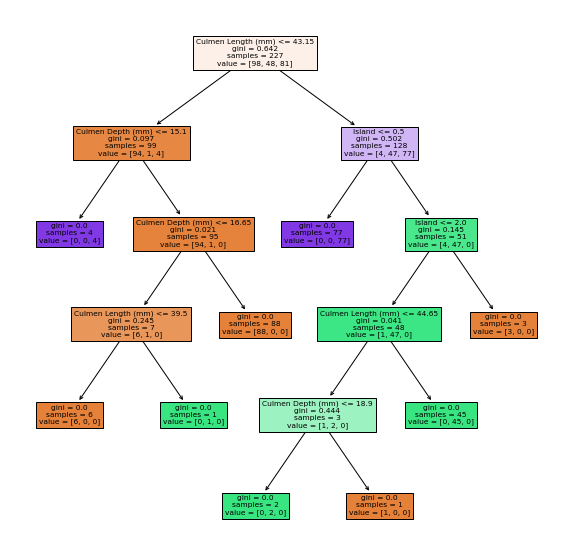

In [11]:
fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree(T, 
                   filled = True, 
                   feature_names = penguins.drop(['Species'], axis = 1).columns)